In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../readmaroc/')

In [3]:
from maroc_data import MarocData

In [4]:
high_rate = '../readmaroc/data/farm/Run000077738.dat'
low_rate = '../readmaroc/data/farm/Run000084272.dat'

In [5]:
pedestal = '../readmaroc/data/farm/Run000065467.dat'

In [6]:
run_old = MarocData(high_rate)

In [7]:
run_new = MarocData(low_rate)

In [8]:
run_pedestal = MarocData(pedestal)

In [9]:
run_old.n_active_boards

29

In [10]:
run_new.n_active_boards

29

In [11]:
run_pedestal.n_active_boards

29

In [12]:
run_old.header_board(11)[0]

array([3232286816, 3885127892, 4026717717,         10, 3971113074,
       4070545280,       1195,  944722132,   94524852,   94524864,
       4289272146, 4294854738,    2644794,   94524850,         10,
               18,         18,         12,         12,         11,
               17,         16,         13,         12,         11,
                5,          1,          1,          1,          1,
                1,          5,   33644641,   33644641,   33644641,
         33644641,   33644641,          5,         64])

In [13]:
class Header:
    def __init__(self, header):
        self.header = header
    @property
    def ip(self):
        return self.header[0]
    @property
    def trigg_n_TS(self):
        return self.header[1]
    @property
    def TS(self):
        return self.header[2]
    @property
    def TS_fine_n(self):
        return self.header[3]
    @property
    def TS_fine(self):
        return self.header[4:14]
    @property
    def orcounts_n(self):
        return self.header[14]
    @property
    def orcounts(self):
        return self.header[15:25]
    @property
    def trg_ADC_n(self):
        return self.header[25]
    @property
    def trg_ADC(self):
        return self.header[26:31]
    @property
    def timestamp_ADC_n(self):
        return self.header[31]
    @property
    def timestamp_ADC(self):
        return self.header[32:37]
    @property
    def ADC_samples(self):
        return self.header[37:39]

In [14]:
len(run_new.header)

35386

In [15]:
len(run_old.header)

34819

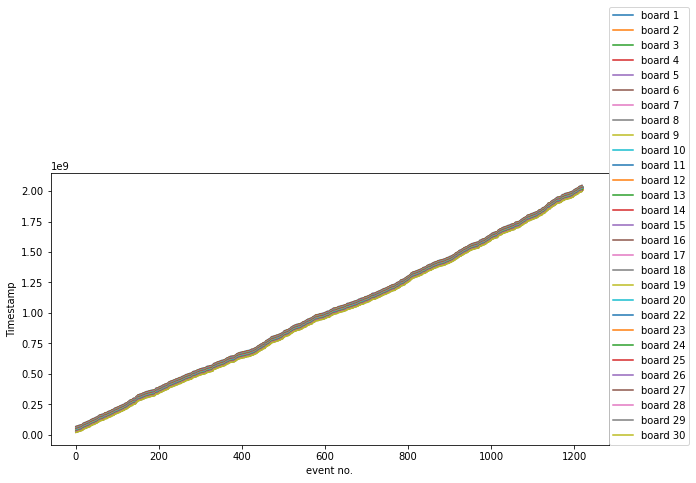

In [21]:
plt.figure(figsize=(10,5))
for b in run_new.active_boards:
    data = run_new.header_board(b)
    ts = [Header(i).TS for i in data]
    nevents = [Header(i).trigg_n_TS for i in data]
    plt.plot(nevents[1:], np.asarray(ts)[1:], label='board {}'.format(b))
    
plt.xlabel('event no.')
plt.ylabel('Timestamp')
plt.legend(loc=(1,0))
plt.show()

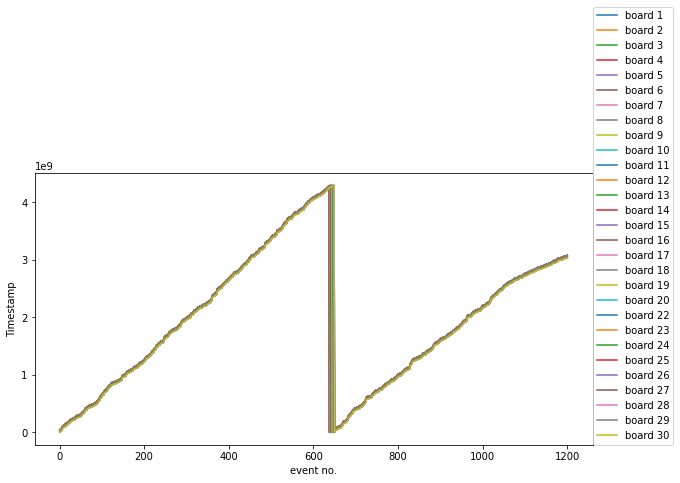

In [20]:
plt.figure(figsize=(10,5))
for b in run_old.active_boards:
    data = run_old.header_board(b)
    ts = [Header(i).TS for i in data]
    nevents = [Header(i).trigg_n_TS for i in data]
    plt.plot(nevents[1:], np.asarray(ts)[1:], label='board {}'.format(b))
plt.xlabel('event no.')
plt.ylabel('Timestamp')
plt.legend(loc=(1,0))
plt.show()

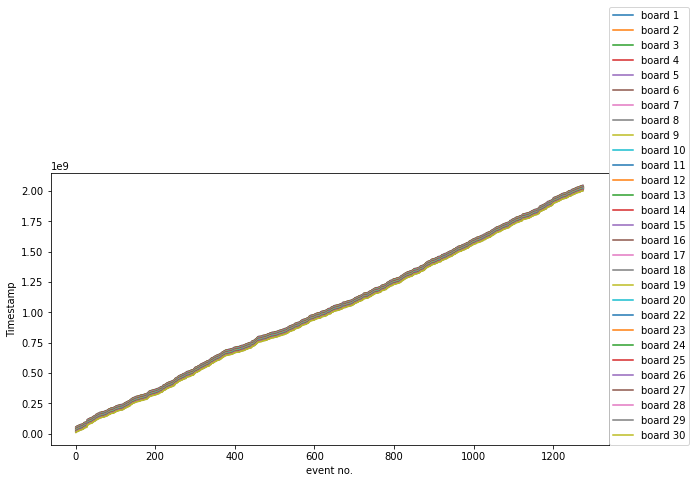

In [22]:
plt.figure(figsize=(10,5))
for b in run_pedestal.active_boards:
    data = run_pedestal.header_board(b)
    ts = [Header(i).TS for i in data]
    nevents = [Header(i).trigg_n_TS for i in data]
    plt.plot(nevents[1:], np.asarray(ts)[1:], label='board {}'.format(b))
plt.xlabel('event no.')
plt.ylabel('Timestamp')
plt.legend(loc=(1,0))
plt.show()

In [24]:
import time

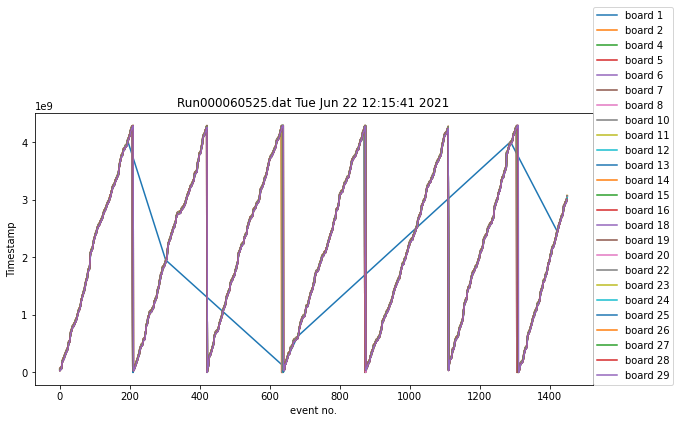

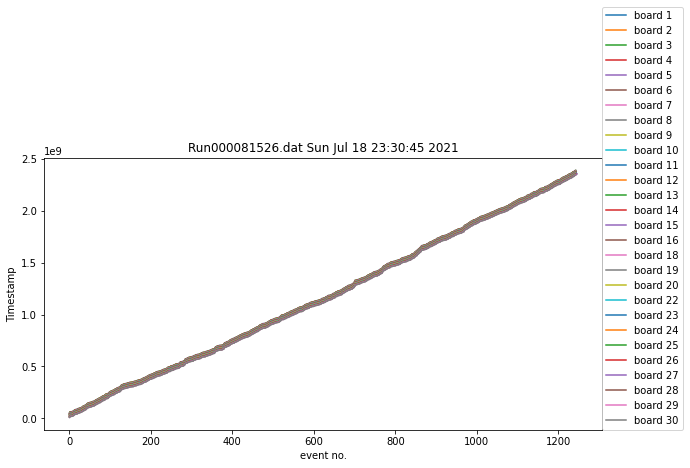

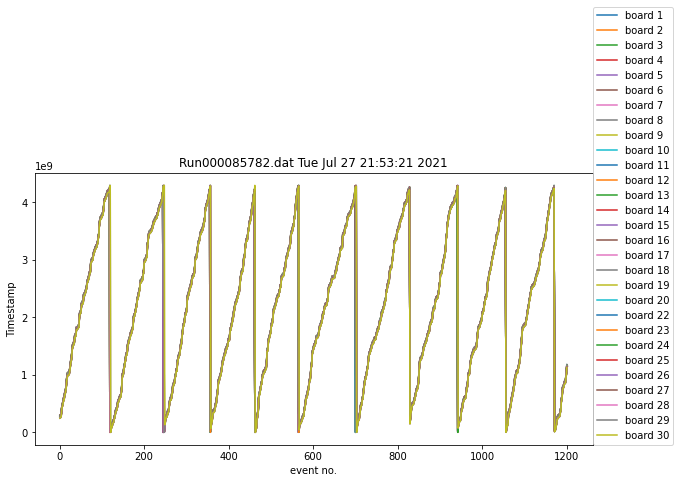

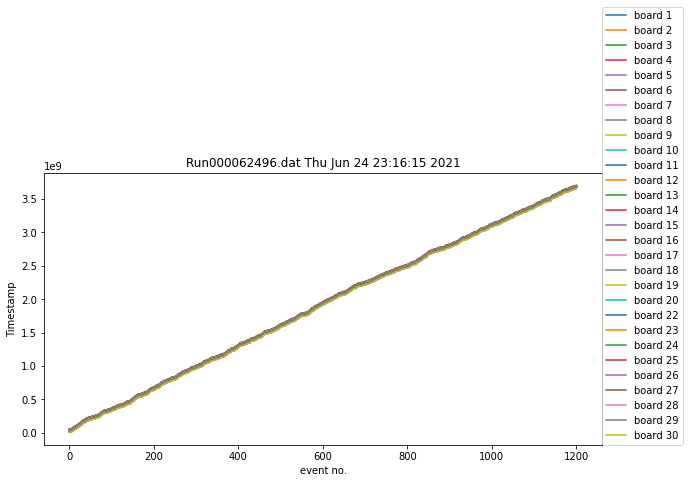

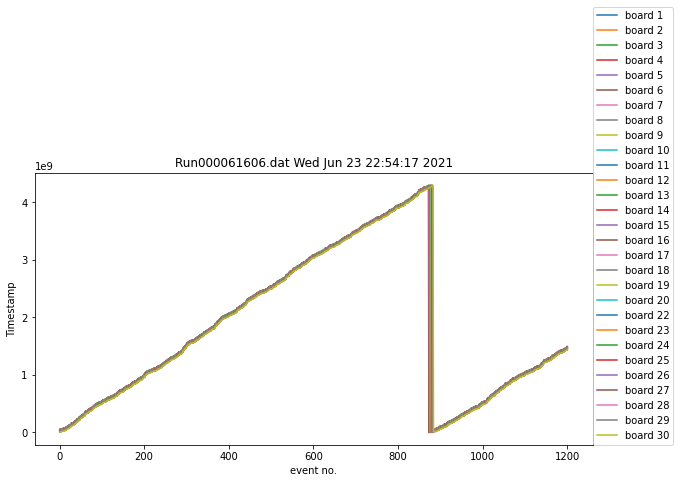

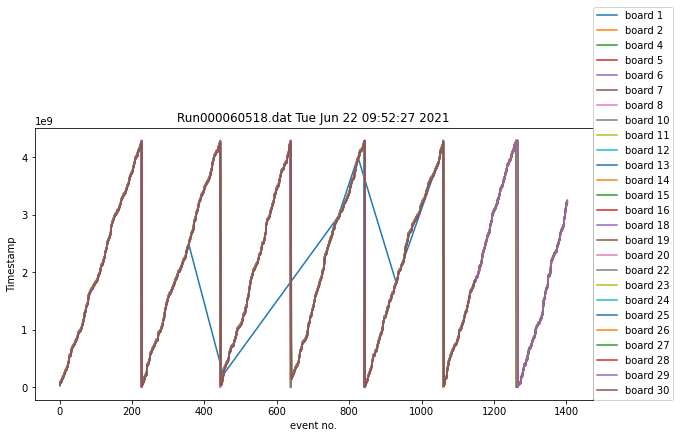

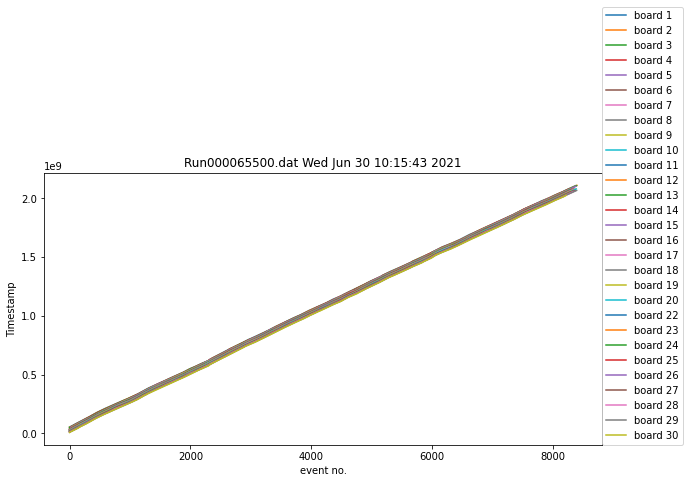

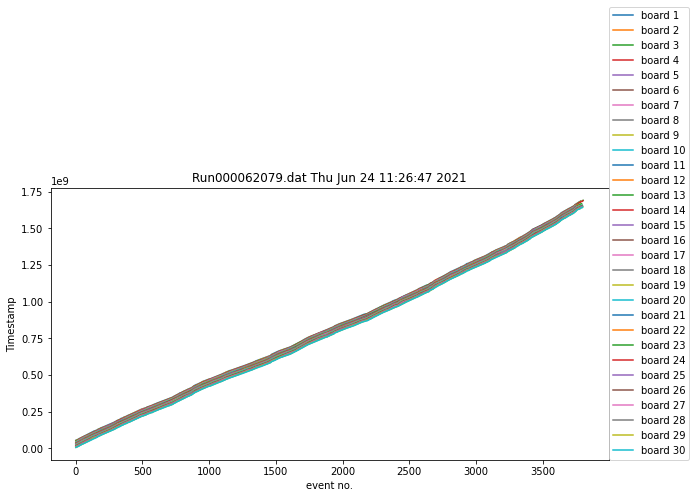

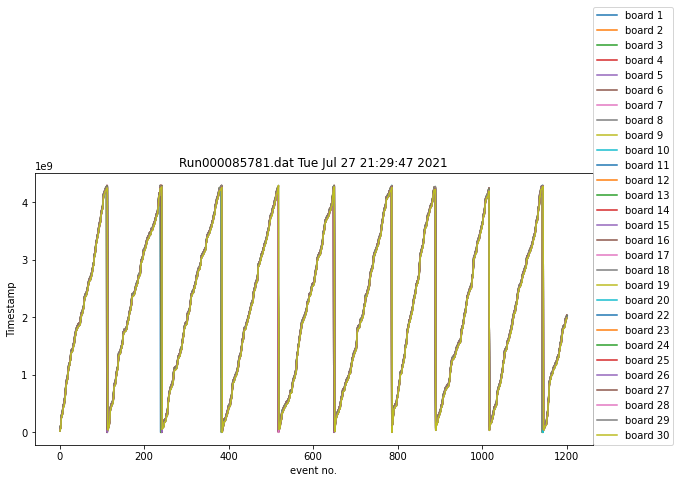

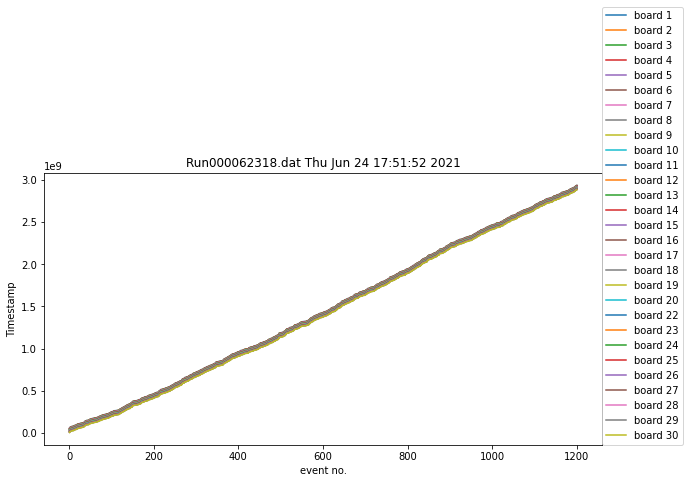

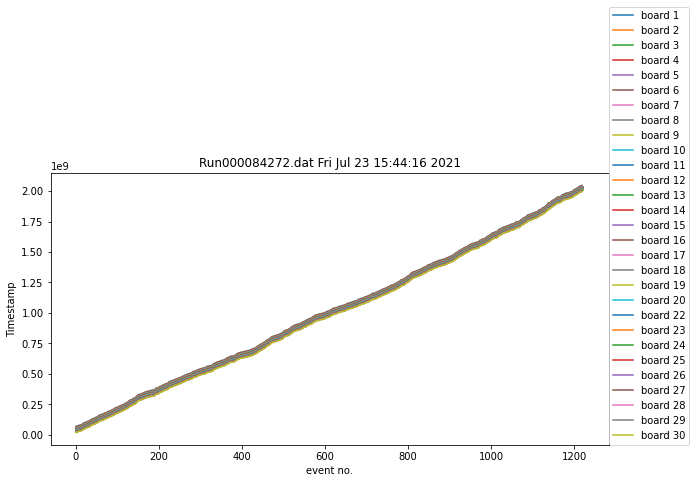

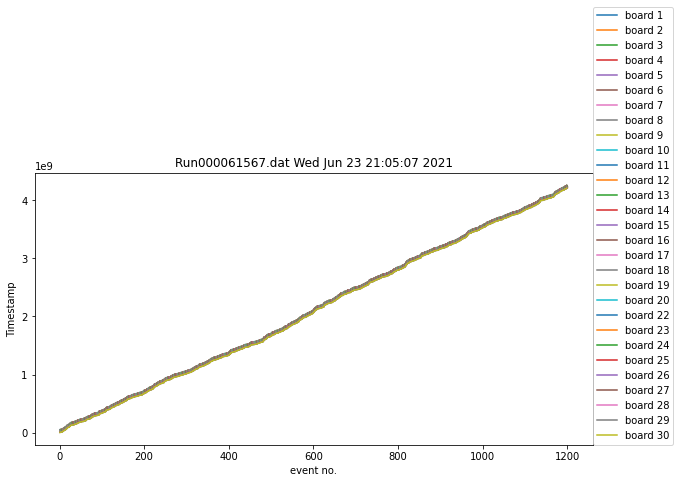

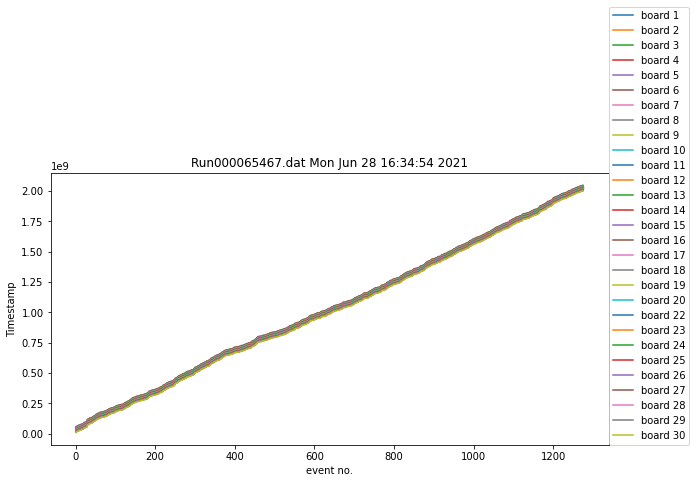

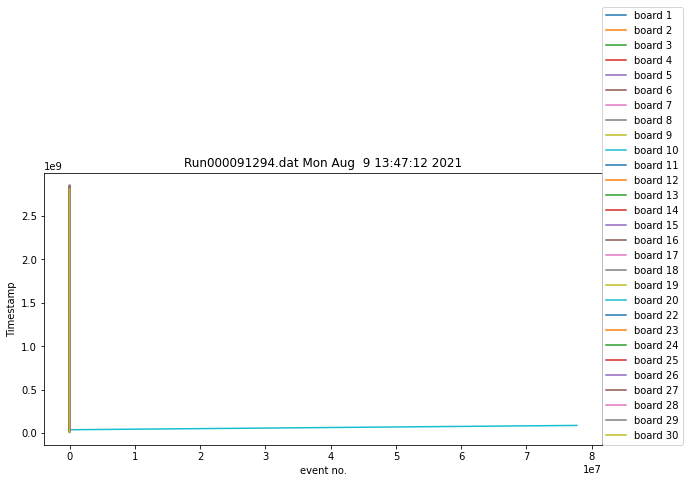

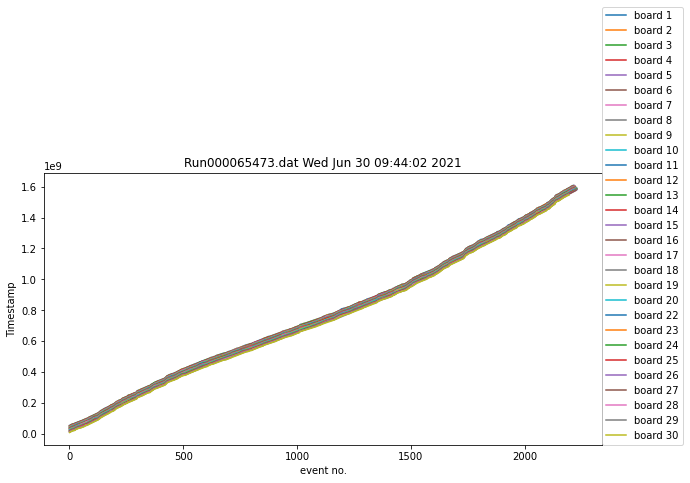

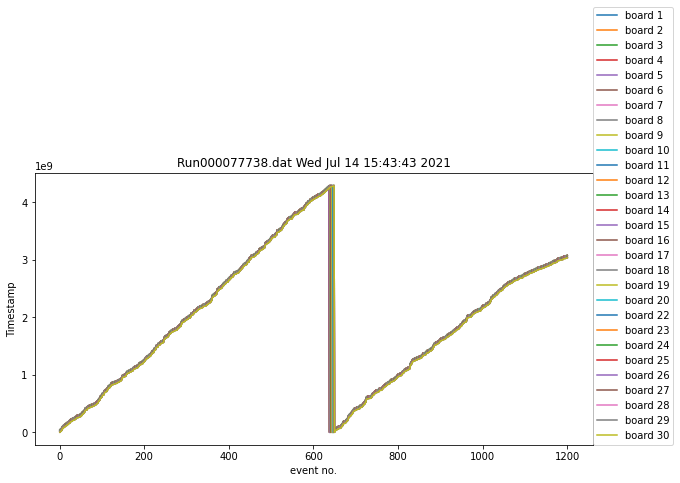

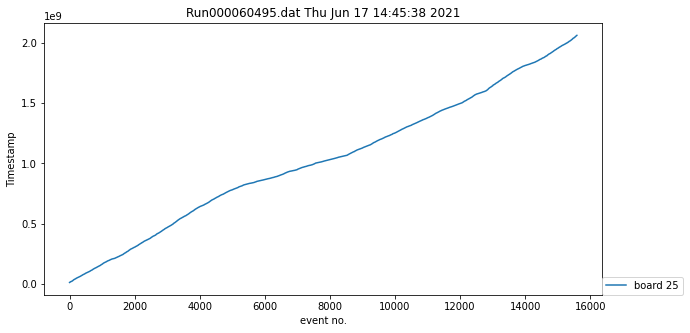

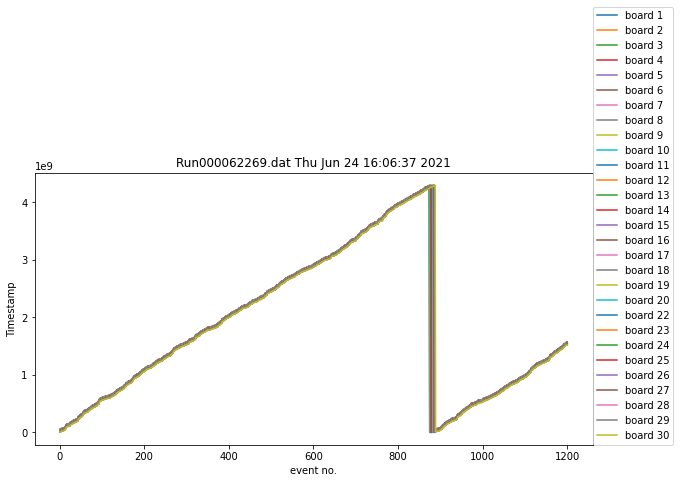

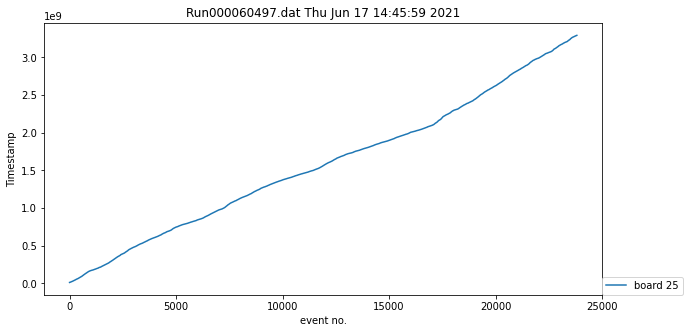

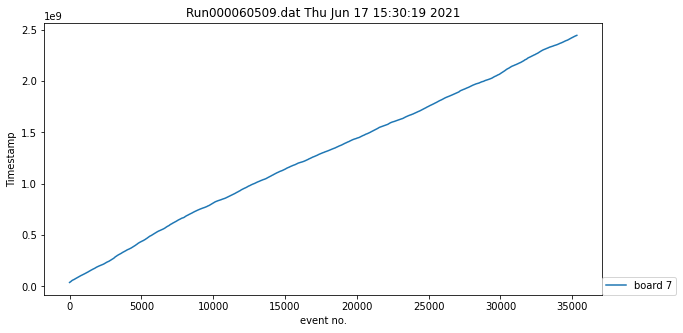

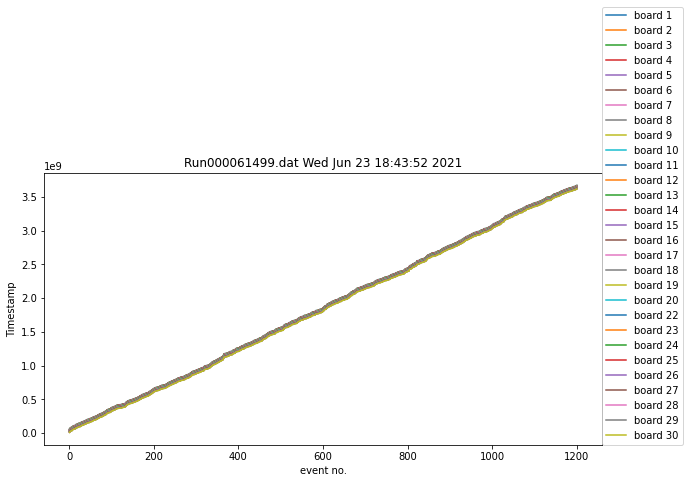

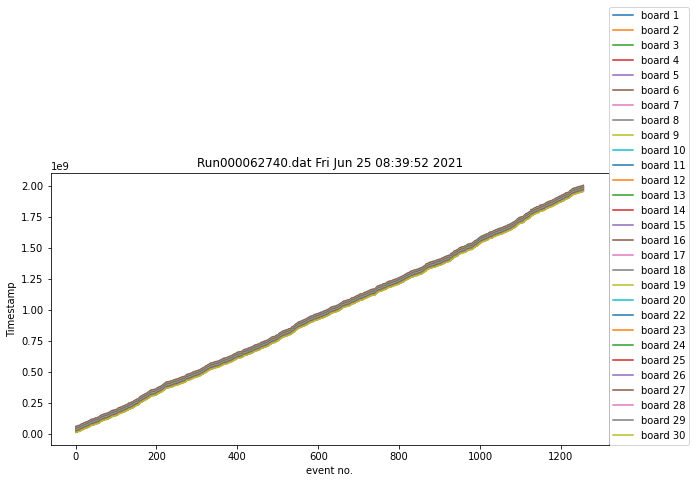

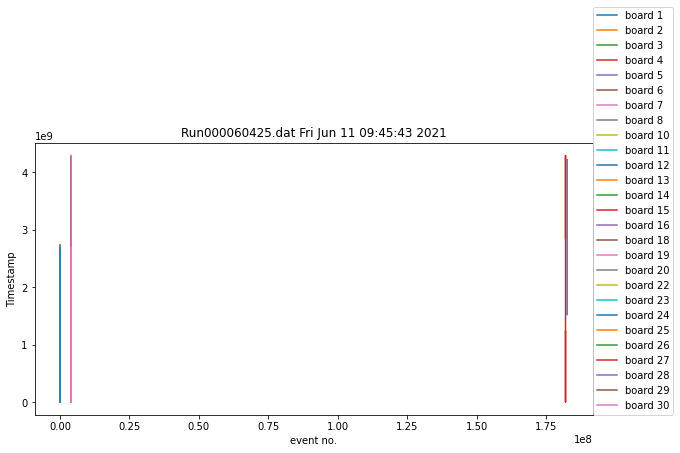

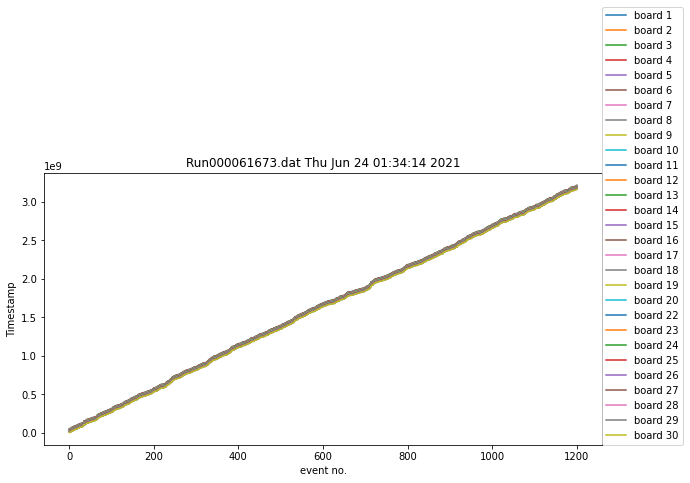

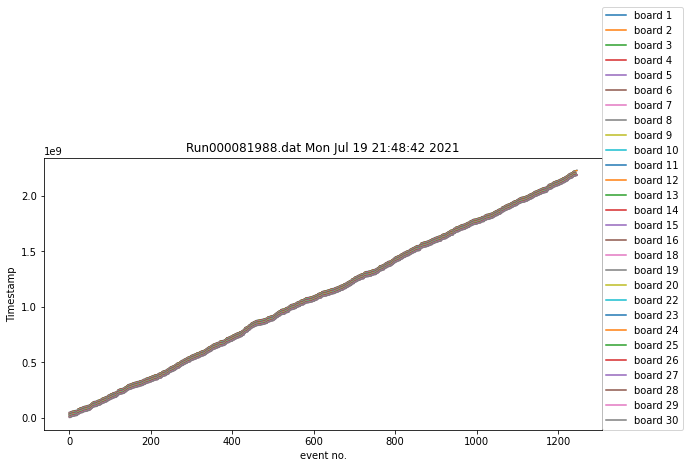

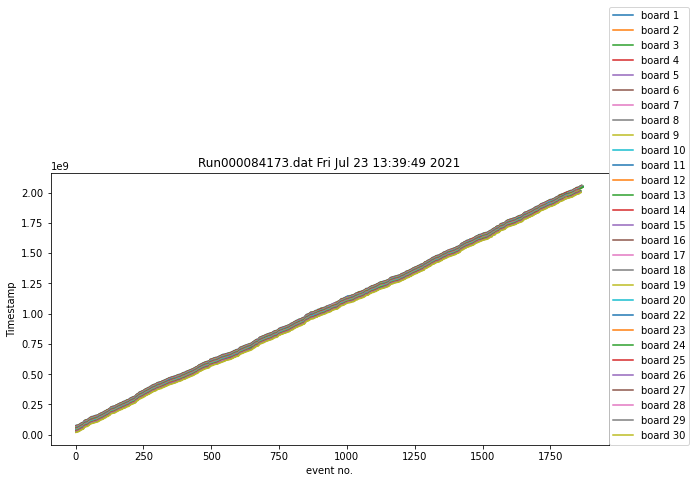

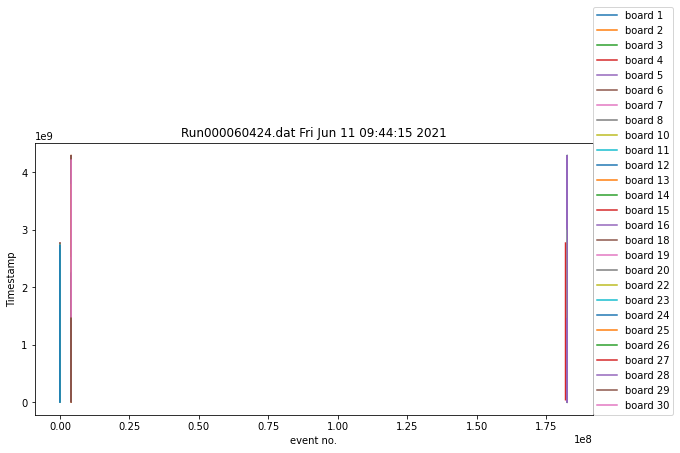

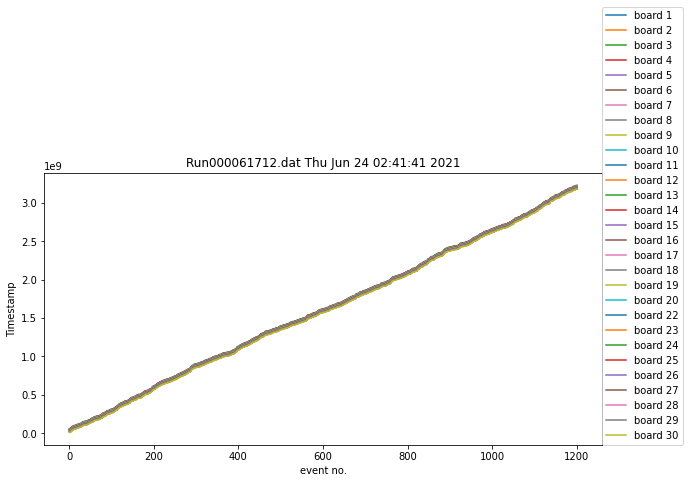

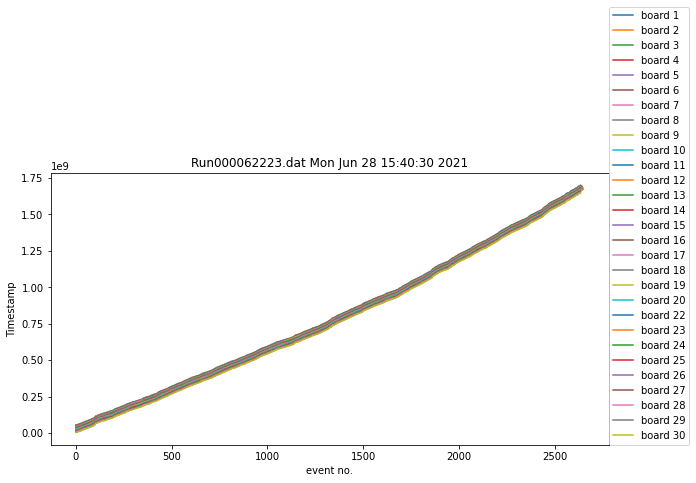

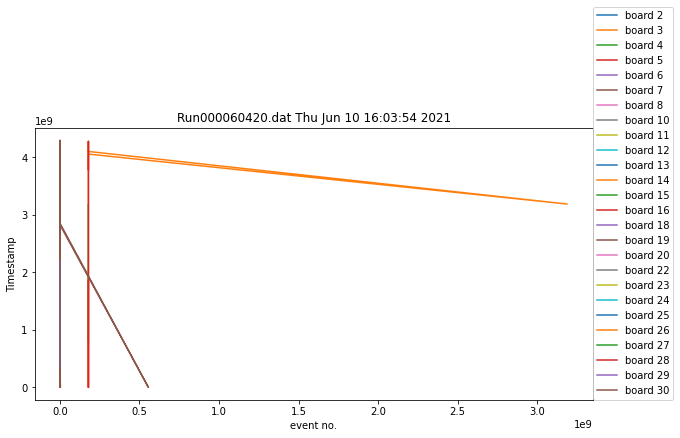

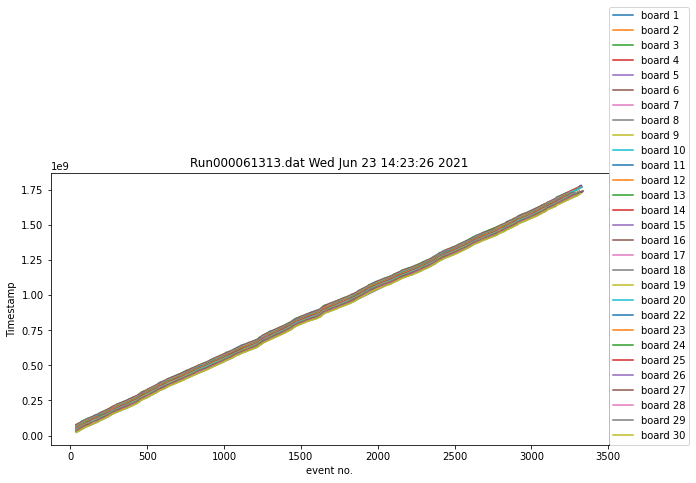

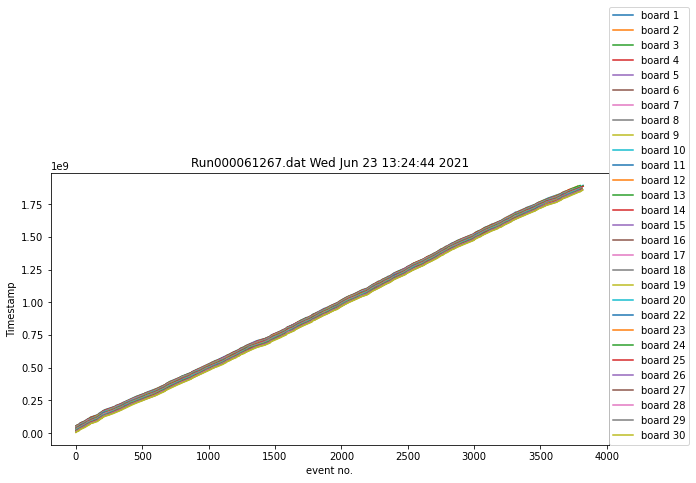

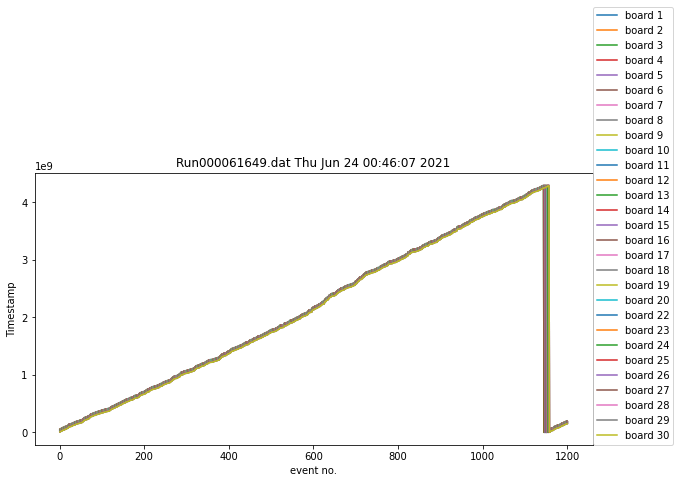

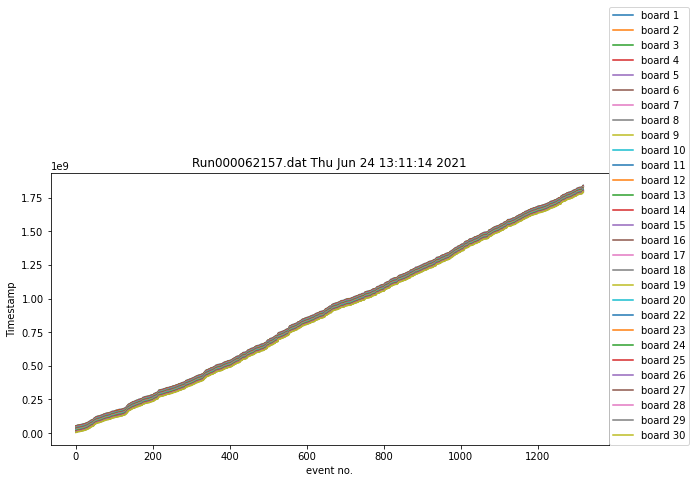

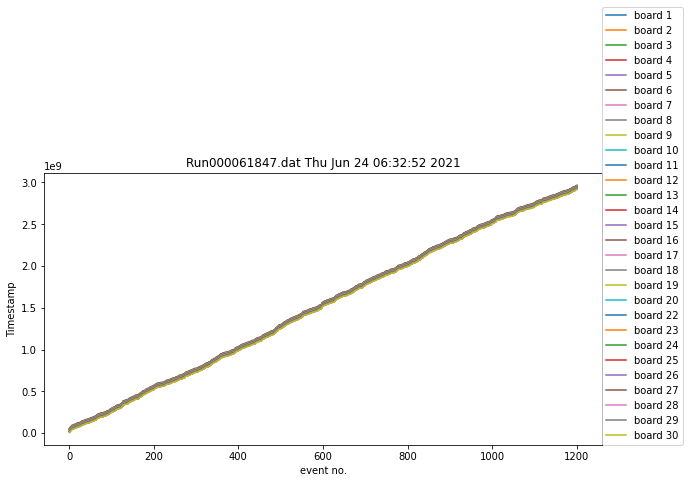

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 720x360 with 0 Axes>

In [25]:
for fil in os.listdir('../readmaroc/data/farm/'):
    if fil.endswith('dat'):
        data = MarocData(os.path.join('../readmaroc/data/farm/',fil))
        plt.figure(figsize=(10,5))
        for b in data.active_boards:
            data_board = data.header_board(b)
            ts = [Header(i).TS for i in data_board]
            nevents = [Header(i).trigg_n_TS for i in data_board]
            plt.plot(nevents[1:], np.asarray(ts)[1:], label='board {}'.format(b))
        plt.title(fil+' '+time.ctime(os.path.getmtime(os.path.join('../readmaroc/data/farm/',fil))))
        plt.xlabel('event no.')
        plt.ylabel('Timestamp')
        plt.legend(loc=(1,0))
        plt.show()

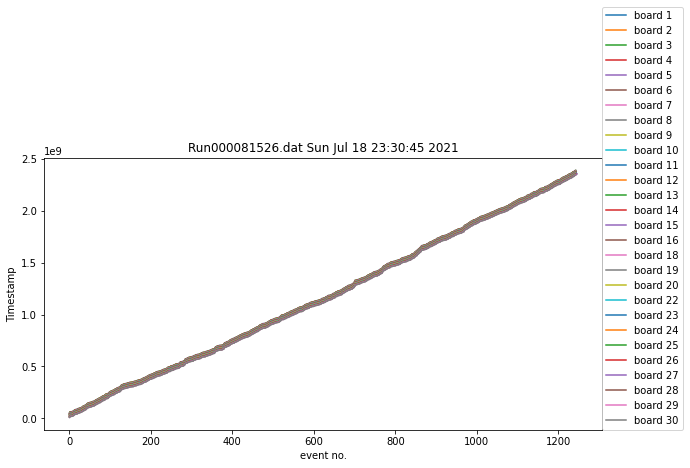

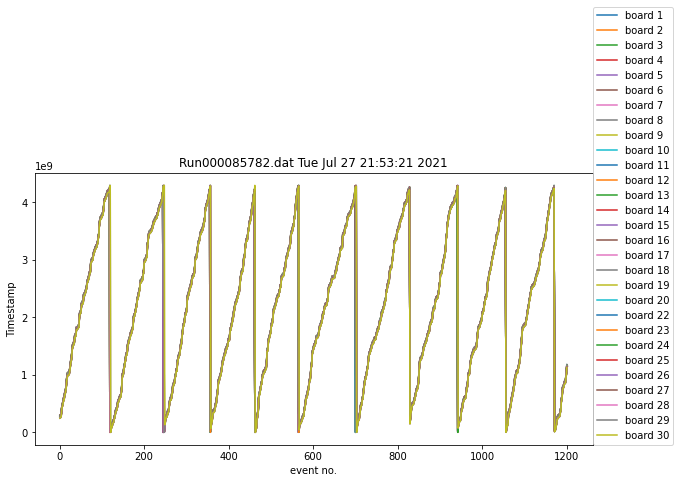

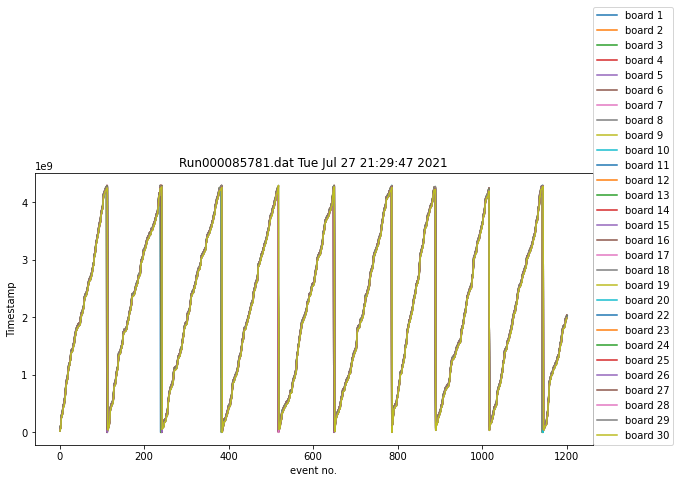

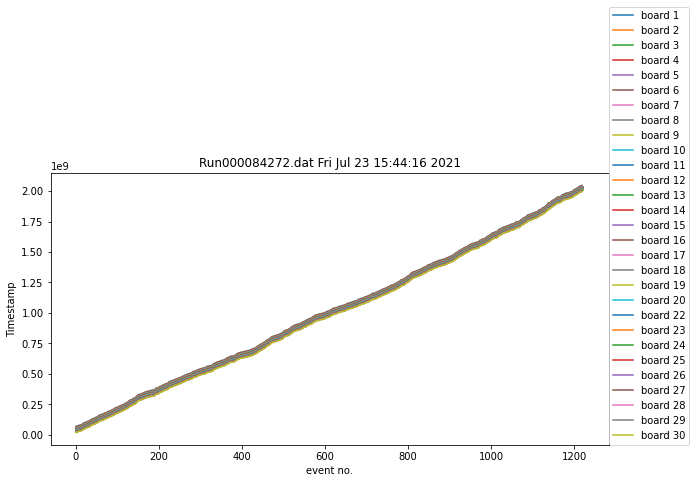

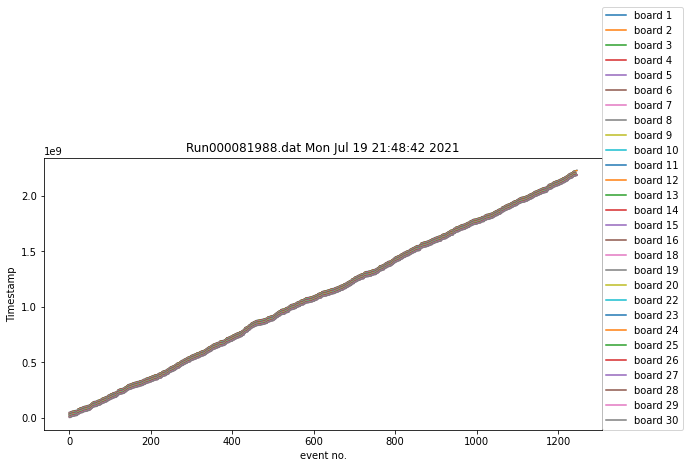

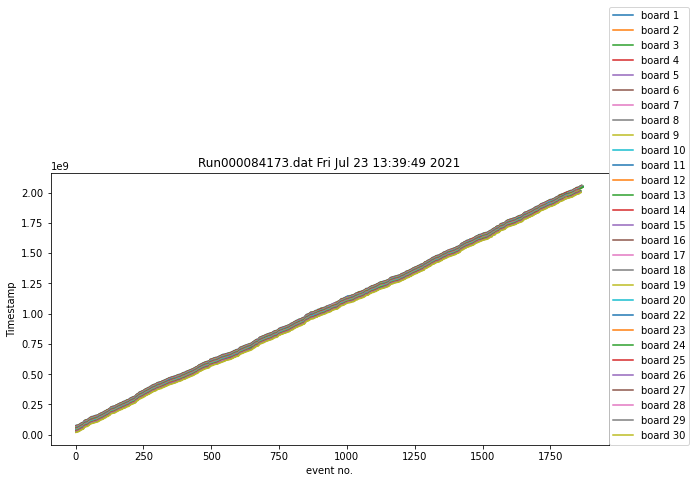

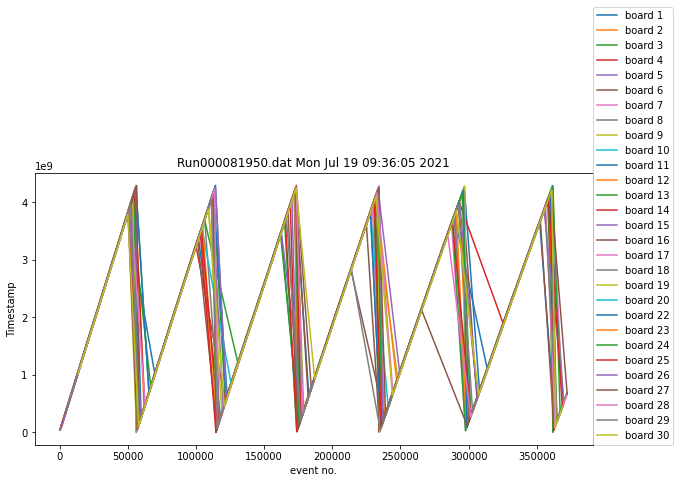

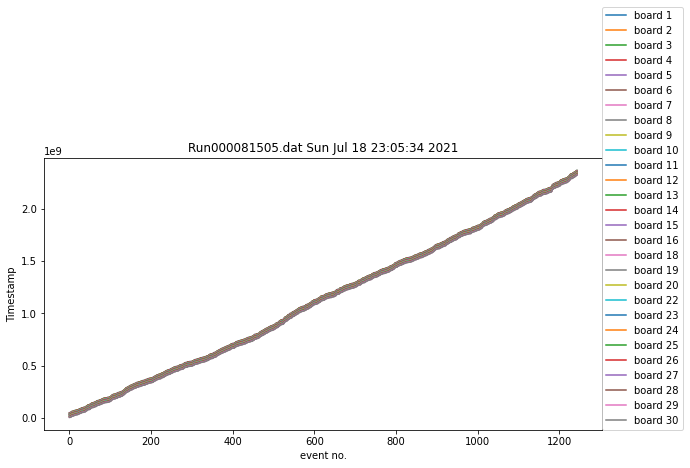

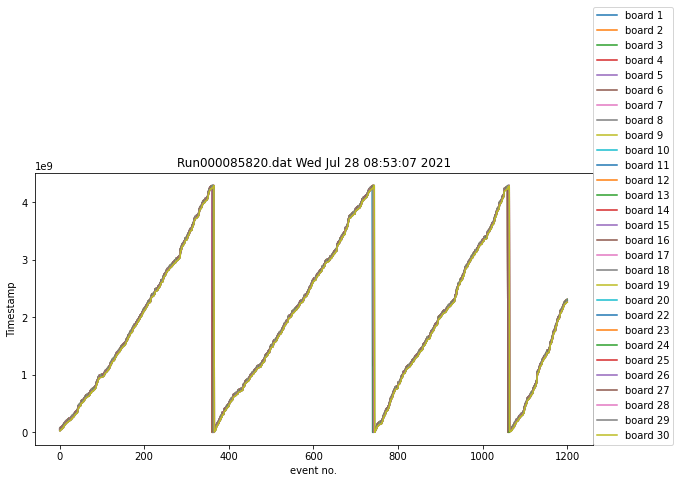

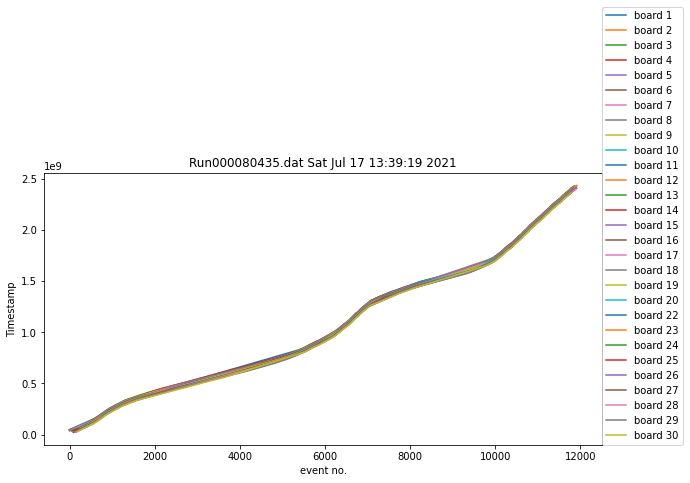

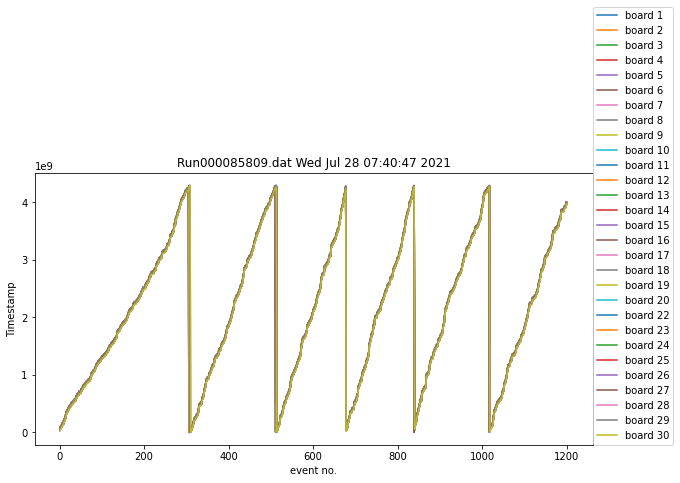

In [26]:
for fil in os.listdir('../readmaroc/data/farm/'):
    if fil.startswith('Run00008'):
        data = MarocData(os.path.join('../readmaroc/data/farm/',fil))
        plt.figure(figsize=(10,5))
        for b in data.active_boards:
            data_board = data.header_board(b)
            ts = [Header(i).TS for i in data_board]
            nevents = [Header(i).trigg_n_TS for i in data_board]
            plt.plot(nevents[1:], np.asarray(ts)[1:], label='board {}'.format(b))
        plt.title(fil+' '+time.ctime(os.path.getmtime(os.path.join('../readmaroc/data/farm/',fil))))
        plt.xlabel('event no.')
        plt.ylabel('Timestamp')
        plt.legend(loc=(1,0))
        plt.show()

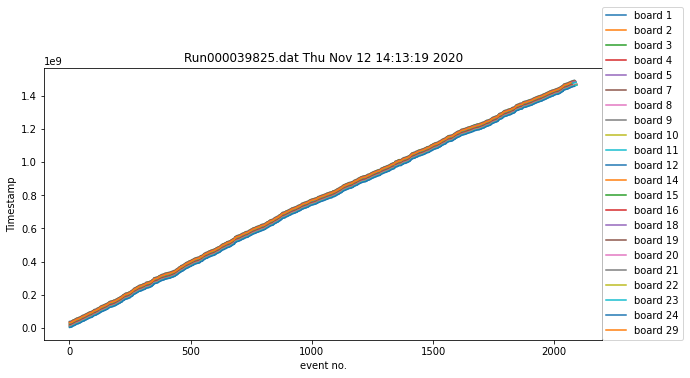

In [27]:
file = '../readmaroc/data/farm/Run000039825.dat'
data = MarocData(file)
plt.figure(figsize=(10,5))
for b in data.active_boards:
    data_board = data.header_board(b)
    ts = [Header(i).TS for i in data_board]
    nevents = [Header(i).trigg_n_TS for i in data_board]
    plt.plot(nevents[1:], np.asarray(ts)[1:], label='board {}'.format(b))
plt.title(file.split('/')[-1]+' '+time.ctime(os.path.getmtime(file)))
plt.xlabel('event no.')
plt.ylabel('Timestamp')
plt.legend(loc=(1,0))
plt.show()

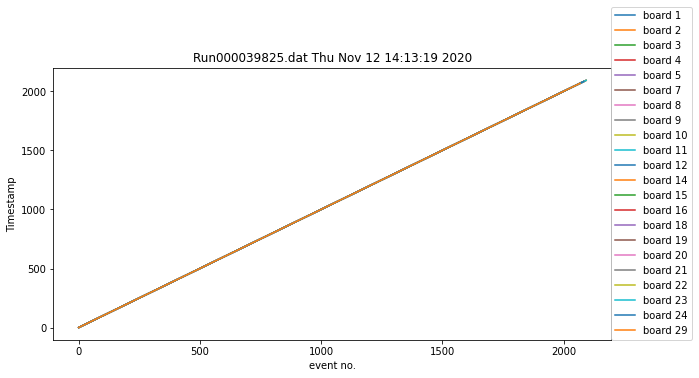

In [28]:
file = '../readmaroc/data/farm/Run000039825.dat'
data = MarocData(file)
plt.figure(figsize=(10,5))
for b in data.active_boards:
    data_board = data.header_board(b)
    ts = [Header(i).trigg_n_TS for i in data_board]
    nevents = [Header(i).trigg_n_TS for i in data_board]
    plt.plot(nevents[1:], np.asarray(ts)[1:], label='board {}'.format(b))
plt.title(file.split('/')[-1]+' '+time.ctime(os.path.getmtime(file)))
plt.xlabel('event no.')
plt.ylabel('Timestamp')
plt.legend(loc=(1,0))
plt.show()

In [153]:
for b in data.active_boards:
    print(b, len(data.header_board(b)))

1 2021
2 2003
3 2045
4 2024
5 2046
7 2026
8 2026
9 2026
10 1965
11 2005
12 1959
14 1951
15 1971
16 2012
18 1994
19 2034
20 1992
21 2053
22 2033
23 2054
24 2044
29 2028
